In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import tensorflow as tf

In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
dfs

[                Date/Time  \
 0     Year 1 Jan 01 01:00   
 1     Year 1 Jan 01 02:00   
 2     Year 1 Jan 01 03:00   
 3     Year 1 Jan 01 04:00   
 4     Year 1 Jan 01 05:00   
 ...                   ...   
 8754  Year 1 Dec 31 19:00   
 8755  Year 1 Dec 31 20:00   
 8756  Year 1 Dec 31 21:00   
 8757  Year 1 Dec 31 22:00   
 8758  Year 1 Dec 31 23:00   
 
       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
 0                                                   0.0        
 1                                                   0.0        
 2                                                   0.0        
 3                                                   0.0        
 4                                                   0.0        
 ...                                                 ...        
 8754                                                0.0        
 8755                                                0.0        
 8756                                                

In [5]:
data=pd.concat(dfs)

In [6]:
data


,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs
0,Year 1 Jan 01 01:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714
1,Year 1 Jan 01 02:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714
2,Year 1 Jan 01 03:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714
3,Year 1 Jan 01 04:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714
4,Year 1 Jan 01 05:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Year 1 Dec 31 19:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577
8755,Year 1 Dec 31 20:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577
8756,Year 1 Dec 31 21:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577
8757,Year 1 Dec 31 22:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577


In [7]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
dtype: object

In [8]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [9]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577


In [10]:
data.iloc[50]

Date/Time                                                 2002-01-03 03:00:00
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)                    0.0
[1] Site Direct Solar Radiation Rate per Area  (W/m2)                     0.0
[1] Site Outdoor Air Dewpoint Temperature  (C)                           6.15
[1] Site Outdoor Air Drybulb Temperature  (C)                            11.8
[1] Site Solar Altitude Angle  (deg)                               -62.150707
[1] Site Solar Azimuth Angle  (deg)                                 95.739049
[1] Site Wind Direction  (deg)                                            0.0
[1] Site Wind Speed  (m/s)                                              0.125
[1] Surface Outside Face Temperature  (C)                           17.089917
Orientation                                                                 0
Lats                                                                  23.0225
Longs                                                           

<Axes: >

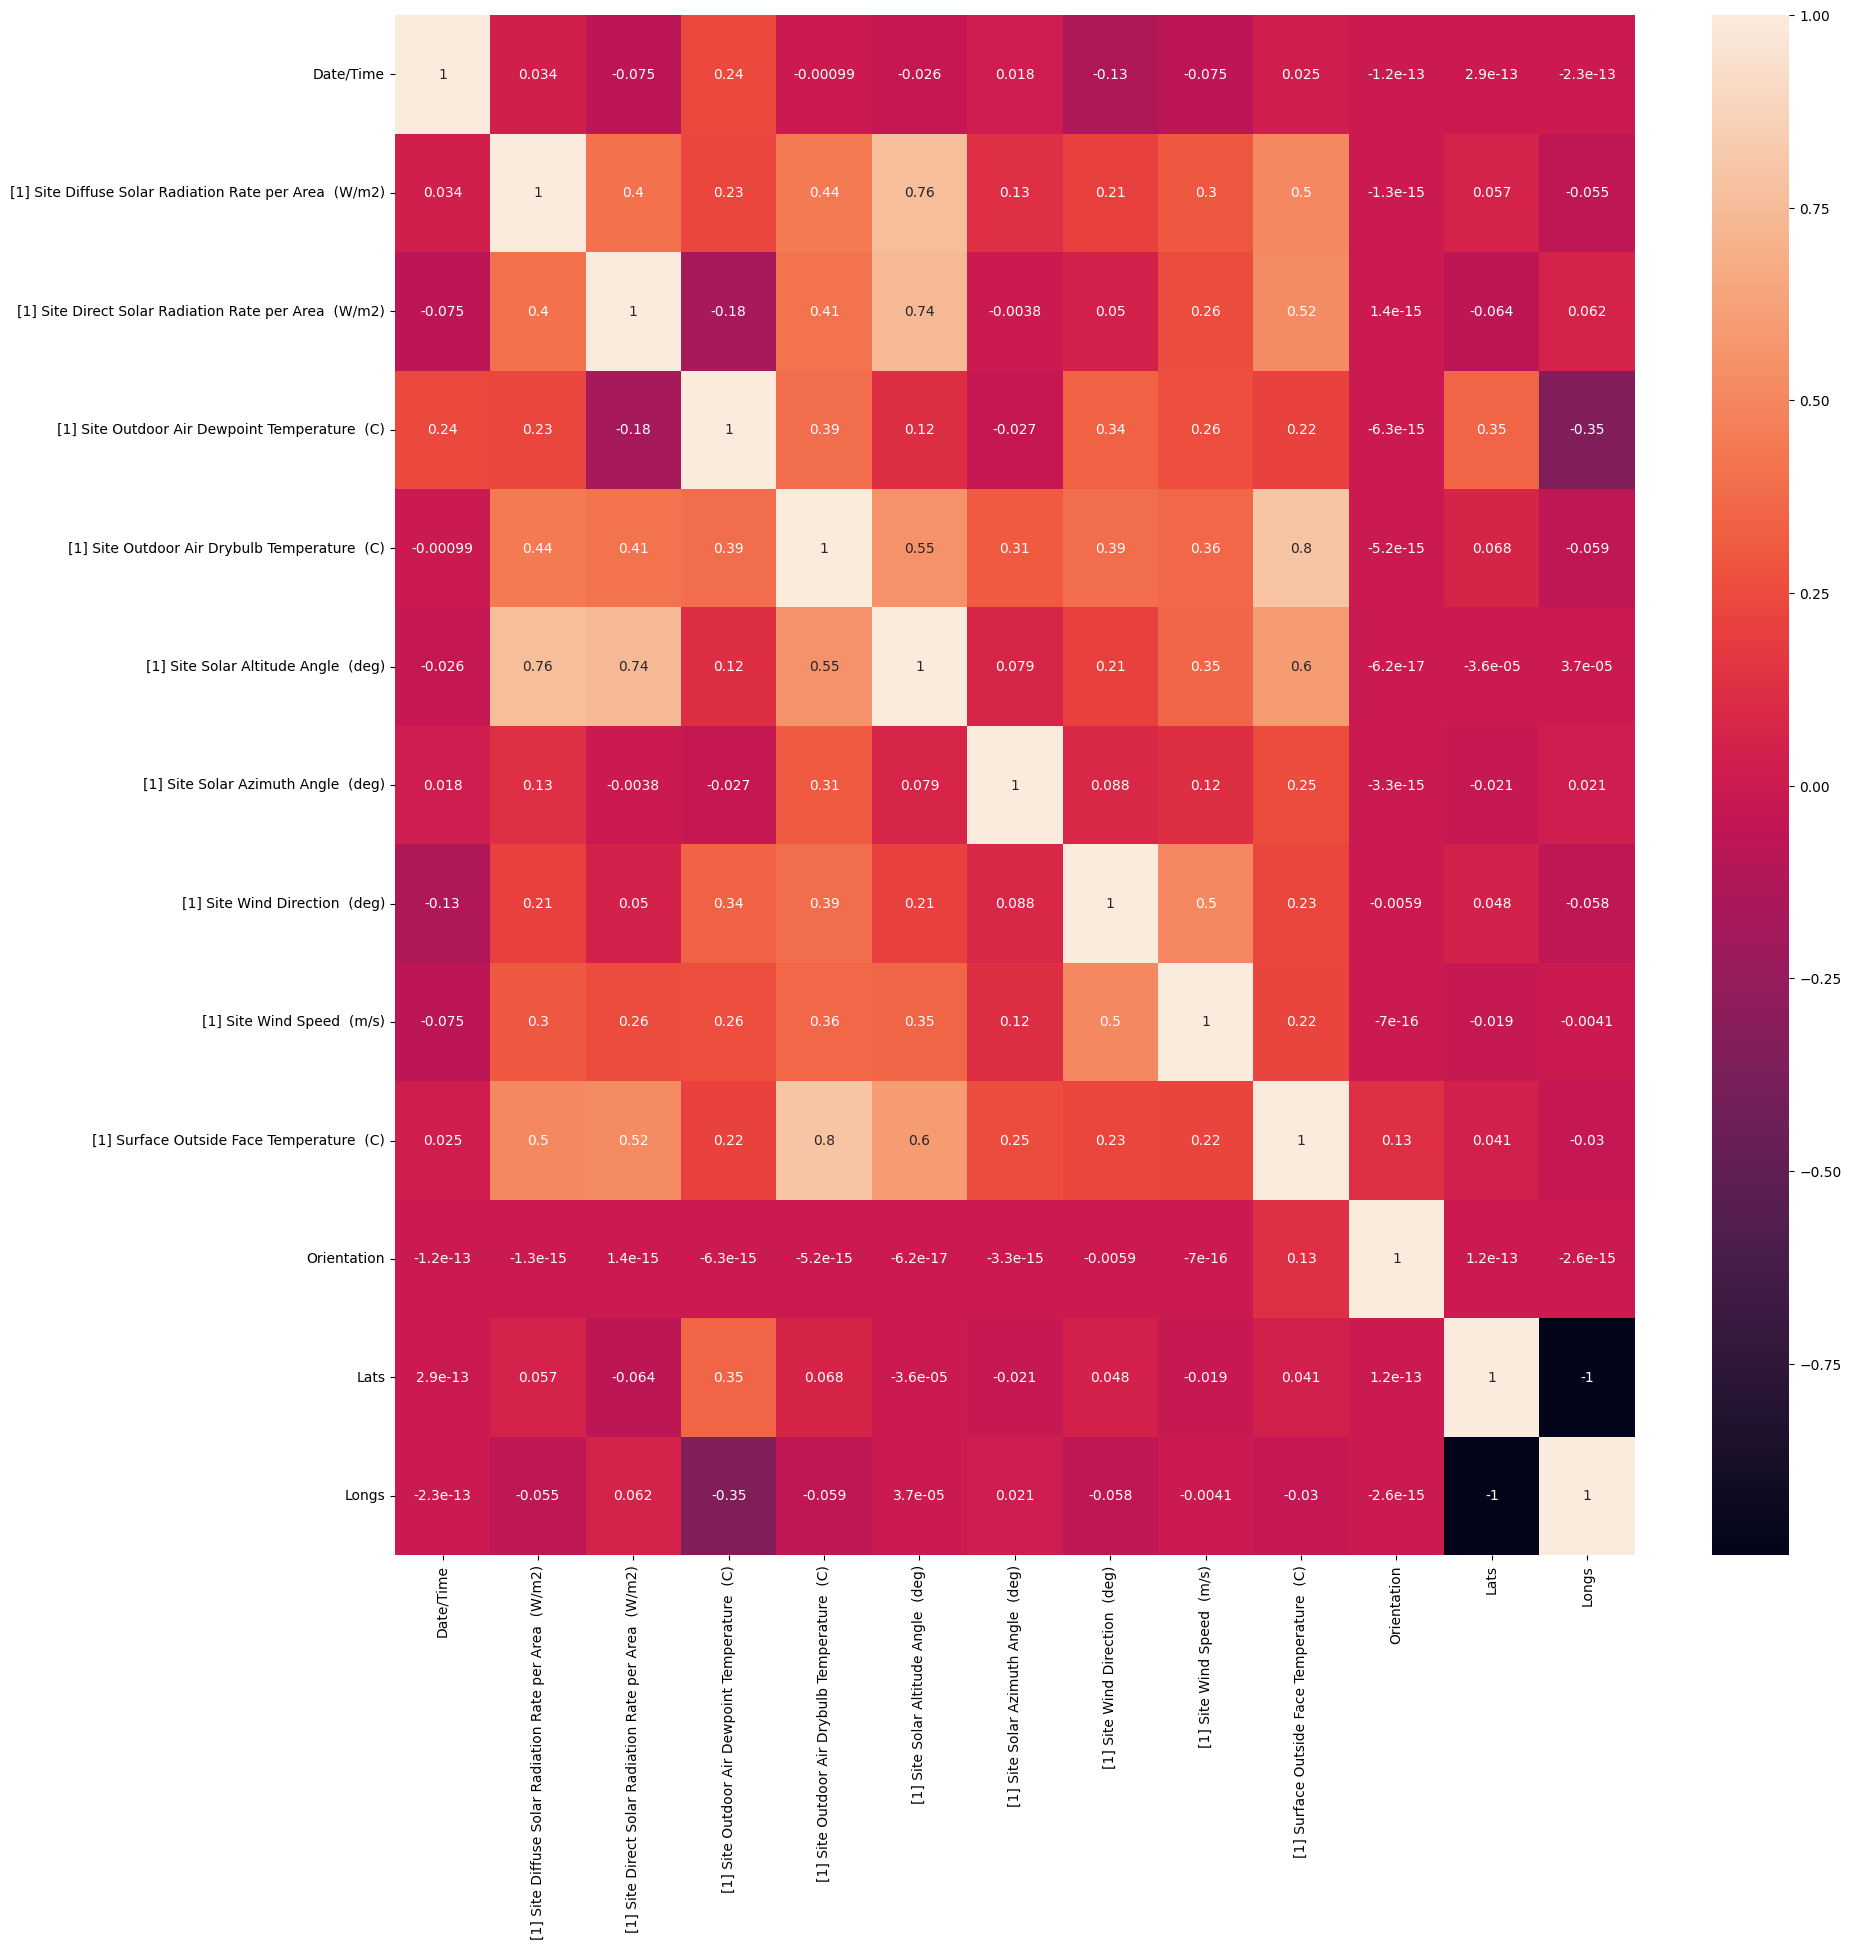

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [12]:
data.dtypes
# Assuming theta, phi, and h are given angles in radians


Date/Time                                                 datetime64[ns]
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)           float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)            float64
[1] Site Outdoor Air Dewpoint Temperature  (C)                   float64
[1] Site Outdoor Air Drybulb Temperature  (C)                    float64
[1] Site Solar Altitude Angle  (deg)                             float64
[1] Site Solar Azimuth Angle  (deg)                              float64
[1] Site Wind Direction  (deg)                                   float64
[1] Site Wind Speed  (m/s)                                       float64
[1] Surface Outside Face Temperature  (C)                        float64
Orientation                                                        int64
Lats                                                             float64
Longs                                                            float64
dtype: object

In [13]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs'],
      dtype='object')

In [15]:
# import math
# import ephem
# import pandas as pd

# def calculate_solar_parameters(data_row):
#     # Set observer's latitude and longitude
#     o.lat, o.long = str(data_row['Lats']), str(data_row['Longs'])

#     # Get the Sun object
#     sun = ephem.Sun()

#     # Calculate sunrise, solar noon, and sunset
#     sunrise = o.previous_rising(sun, start=ephem.now())
#     solar_noon = o.next_transit(sun, start=sunrise)
#     sunset = o.next_setting(sun, start=solar_noon)

#     # Convert ephem.Date to pandas Timestamp
#     solar_noon = pd.to_datetime(solar_noon.datetime())

#     # Determine if the given time is before or after solar noon
#     given_time = data_row['Date/Time']
#     if given_time < solar_noon:
#         hourangle = 2.5 * (abs((given_time - solar_noon).seconds) // 60)
#     else:
#         hourangle = -2.5 * (abs((given_time - solar_noon).seconds) // 60)

#     # Calculate declination
#     N = data_row['N']
#     declination = 23.45 * math.sin(math.radians(360 * (284 + N) / 365))

#     # Get azimuth from the data_row
#     azimuth = data_row['[1] Site Solar Azimuth Angle  (deg)']

#     return declination, hourangle, azimuth

# def calculate_tt(data_row):
#     # Get solar parameters
#     declination, hourangle, azimuth = calculate_solar_parameters(data_row)

#     # Convert angles to radians for trigonometric functions
#     latitude_rad = math.radians(data_row['Lats'])
#     declination_rad = math.radians(declination)
#     hourangle_rad = math.radians(hourangle)
#     azimuth_rad = math.radians(azimuth)

#     # Calculate the cosine of tt using the given formula
#     cos_tt = (
#         -math.cos(latitude_rad) * math.sin(declination_rad) * math.cos(azimuth_rad)
#         + math.sin(latitude_rad) * math.cos(declination_rad) * math.cos(hourangle_rad) * math.cos(azimuth_rad)
#         + math.cos(declination_rad) * math.sin(hourangle_rad) * math.sin(azimuth_rad)
#     )

#     # Calculate tt using the arccosine function
#     tt = cos_tt

#     return tt

# # Assuming your DataFrame is named 'data'
# data['N'] = data['Date/Time'].dt.dayofyear

# # Create an observer
# o = ephem.Observer()

# # Apply the functions to each row of the DataFrame
# data['cos_incident_angle'] = data.apply(calculate_tt, axis=1)

# # Display the result
# print(data[['Date/Time', 'Lats', 'Longs', 'cos_incident_angle']])


In [16]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577


In [17]:
# data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] = pd.to_numeric(data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'], errors='coerce')
# data['[1] Site Solar Azimuth Angle  (deg)'] = pd.to_numeric(data['[1] Site Solar Azimuth Angle  (deg)'], errors='coerce')

# data['solar gain'] = data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * data['cos_incident_angle'] +\
#                      data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * (1 + np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)'])) / 2)


In [18]:
# data['cos_altitude']=np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))

In [19]:
# plt.figure(figsize = (20,20))
# sns.heatmap(data.corr(),annot = True)

In [20]:
# plt.scatter(data['[1] Site Wind Speed  (m/s)'],data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'])

In [21]:
column_name=[ '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)'
      ]

In [22]:
data1=data
data1.drop(column_name,axis=1,inplace=True)

In [23]:
data1

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,17.425801,0,23.0225,72.5714
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,17.436224,0,23.0225,72.5714
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,17.430286,0,23.0225,72.5714
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,17.410444,0,23.0225,72.5714
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,17.374948,0,23.0225,72.5714
...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,23.663594,90,22.7196,75.8577
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,22.149918,90,22.7196,75.8577
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,20.445485,90,22.7196,75.8577
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,19.256711,90,22.7196,75.8577


In [24]:


# Assuming your dataframe is named df
# Convert the 'Date/Time' column to datetime format
data1['Date/Time'] = pd.to_datetime(data1['Date/Time'])

# Extract month, day, and hour into separate columns
data1['Month'] = data1['Date/Time'].dt.month
data1['Day'] = data1['Date/Time'].dt.day
data1['Hour'] = data1['Date/Time'].dt.hour

# Display the modified dataframe
data1


,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,Month,Day,Hour
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,17.425801,0,23.0225,72.5714,1,1,1
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,17.436224,0,23.0225,72.5714,1,1,2
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,17.430286,0,23.0225,72.5714,1,1,3
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,17.410444,0,23.0225,72.5714,1,1,4
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,17.374948,0,23.0225,72.5714,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,23.663594,90,22.7196,75.8577,12,31,19
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,22.149918,90,22.7196,75.8577,12,31,20
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,20.445485,90,22.7196,75.8577,12,31,21
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,19.256711,90,22.7196,75.8577,12,31,22


In [25]:
data1.drop(['Date/Time'],axis=1,inplace=True)

In [26]:
data1

,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,Month,Day,Hour
0,0.0,0.0,5.600,14.075,-86.550209,91.104045,17.425801,0,23.0225,72.5714,1,1,1
1,0.0,0.0,6.500,13.550,-75.710457,93.157099,17.436224,0,23.0225,72.5714,1,1,2
2,0.0,0.0,7.400,13.125,-61.958056,96.159063,17.430286,0,23.0225,72.5714,1,1,3
3,0.0,0.0,7.825,12.400,-48.286846,99.382686,17.410444,0,23.0225,72.5714,1,1,4
4,0.0,0.0,7.975,11.600,-34.749348,102.923038,17.374948,0,23.0225,72.5714,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,0.0,0.0,6.325,21.350,-12.176278,249.653350,23.663594,90,22.7196,75.8577,12,31,19
8755,0.0,0.0,6.550,18.375,-25.321975,254.015331,22.149918,90,22.7196,75.8577,12,31,20
8756,0.0,0.0,7.050,16.025,-38.737982,257.722237,20.445485,90,22.7196,75.8577,12,31,21
8757,0.0,0.0,7.575,14.450,-52.333160,260.924964,19.256711,90,22.7196,75.8577,12,31,22


In [27]:
 from sklearn.linear_model import LinearRegression


In [28]:
X = data1.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = data1['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', 'Orientation', 'Lats', 'Longs',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [30]:
reg = LinearRegression().fit(X_train, y_train)

In [31]:
reg.score(X_train, y_train)

0.7204629318738524

In [32]:
reg.coef_

array([ 1.28506379e-02,  5.72534005e-03, -5.77547153e-02,  8.64717173e-01,
       -1.38929123e-02,  3.90621307e-04,  1.05666921e-02,  6.42104862e+01,
        5.38724932e+00,  1.10222615e-01, -1.55887223e-03,  5.17588350e-02])

<Axes: >

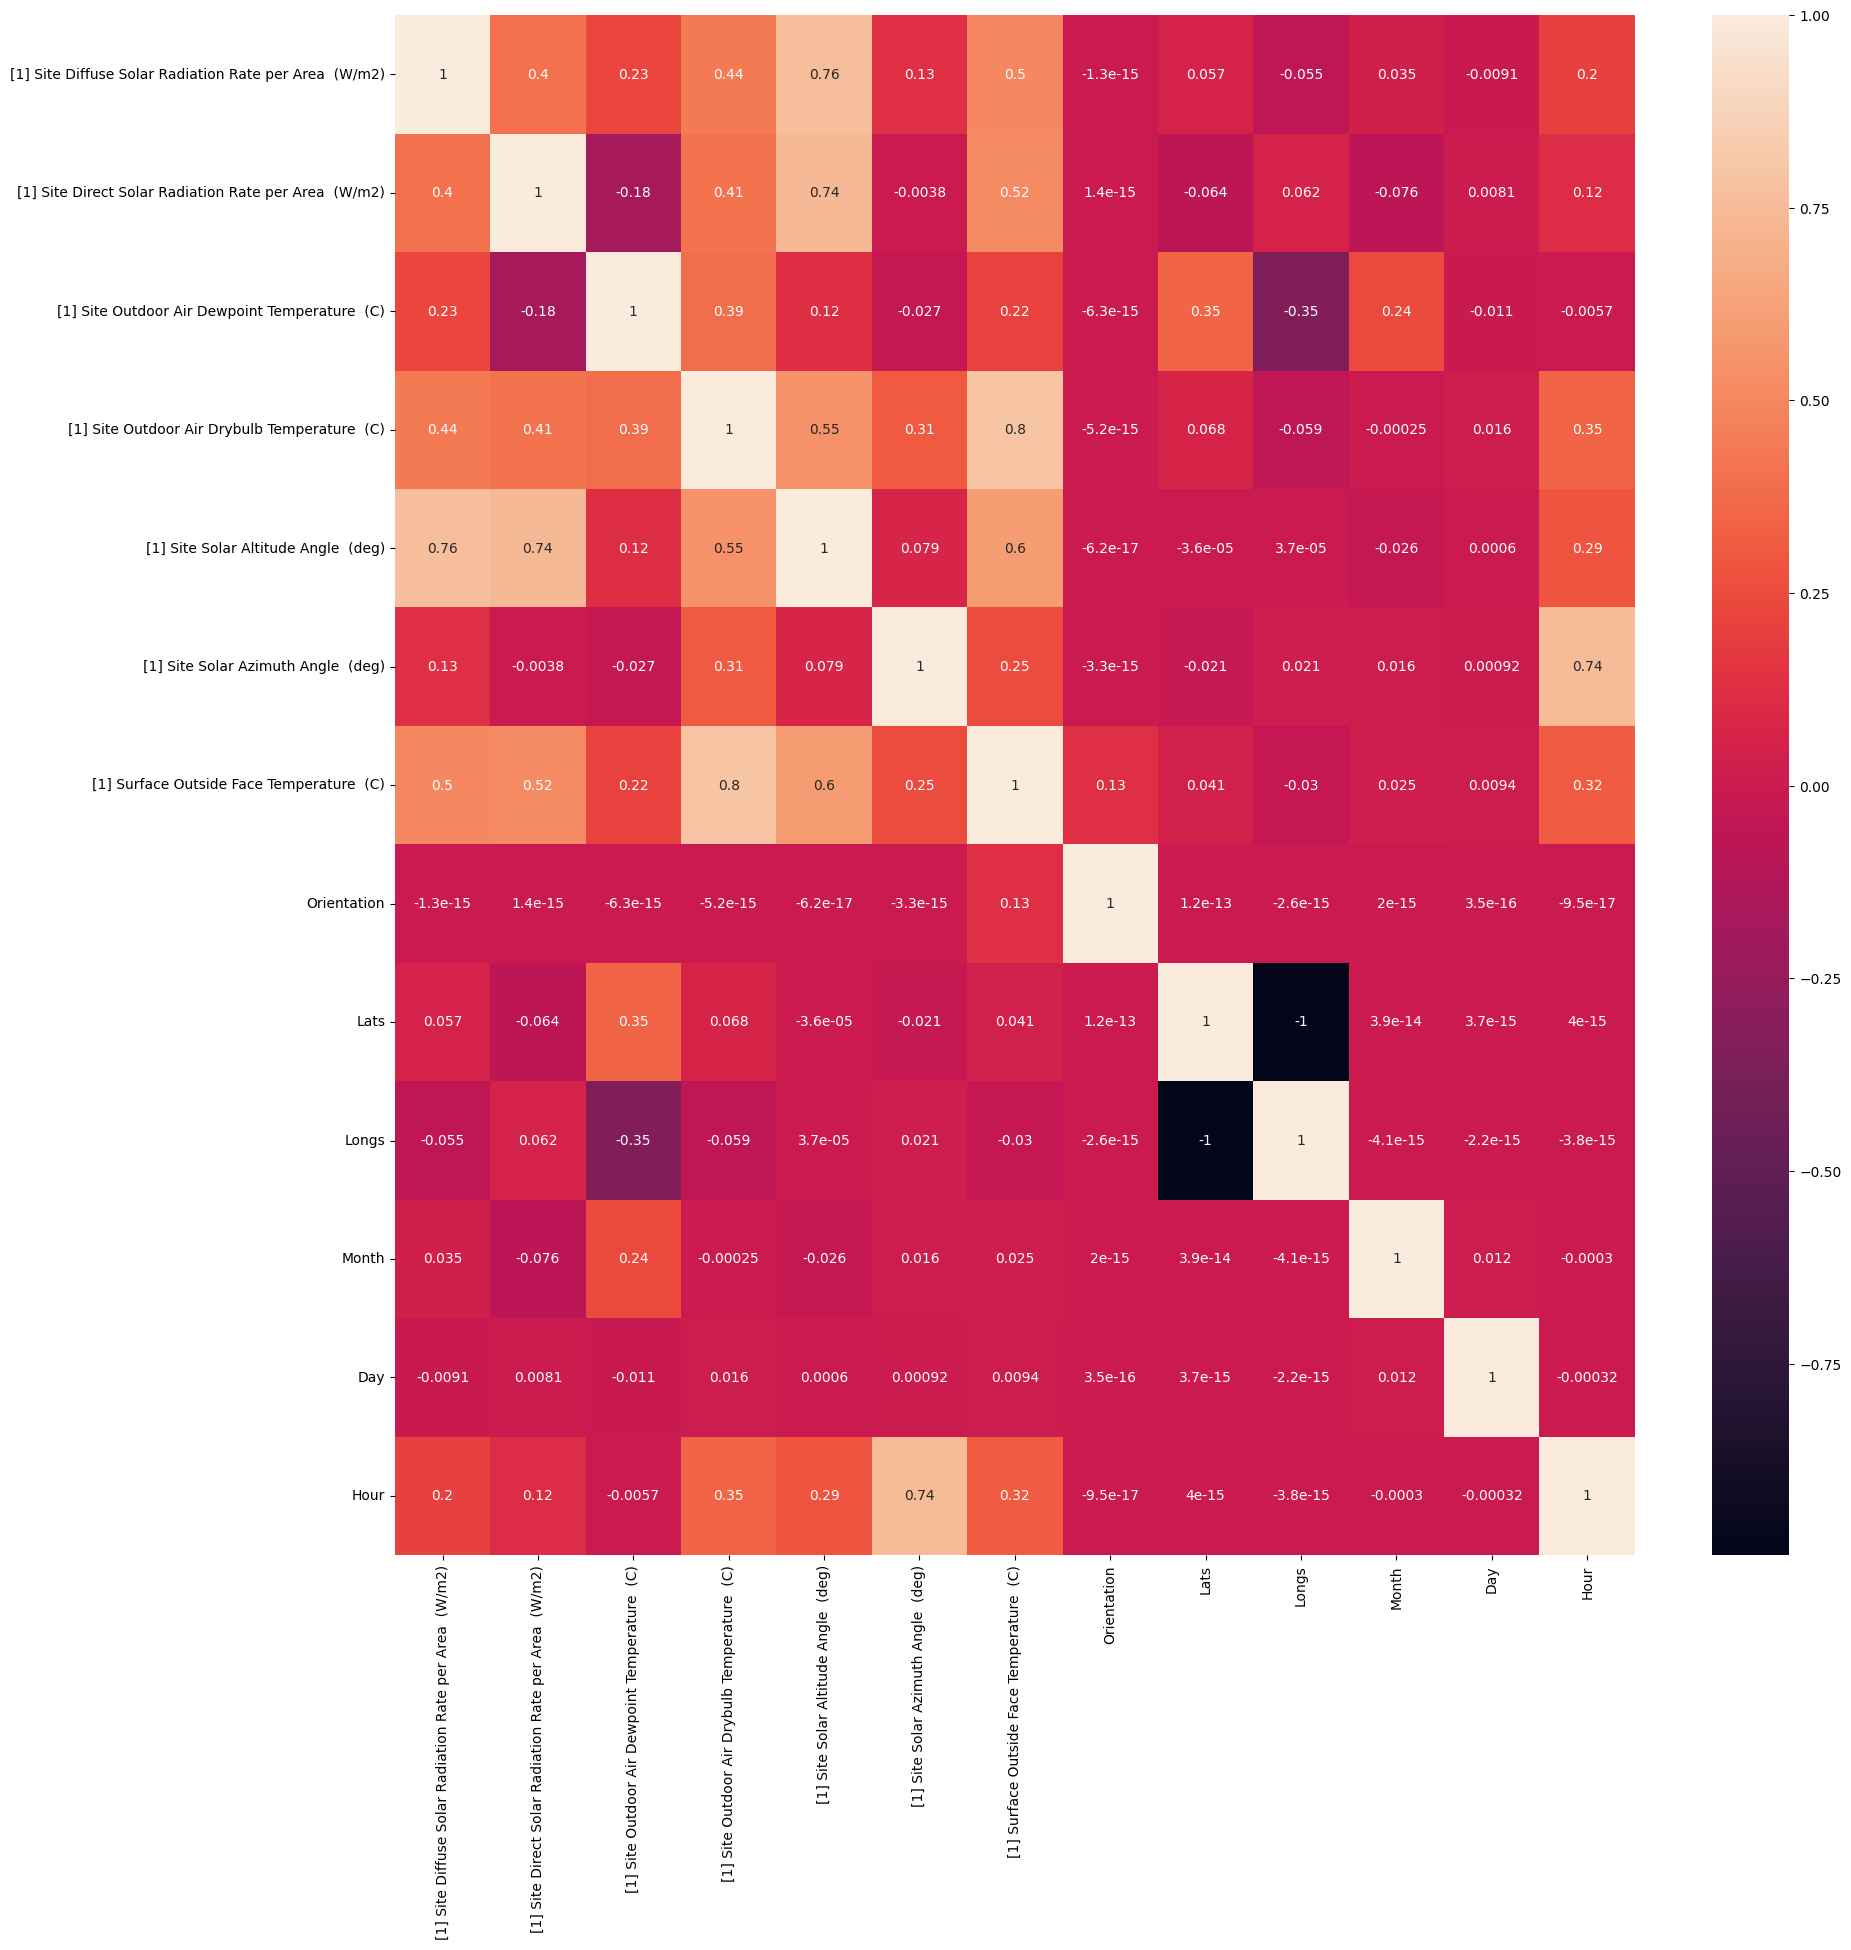

In [33]:
plt.figure(figsize = (20,20))
sns.heatmap(data1.corr(),annot = True)

In [34]:
import math
data['cos_orientation'] = np.cos(np.radians(data['Orientation']))
data['cos_[1] Site Solar Altitude Angle  (deg)'] = np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))
data['cos_[1] Site Solar Azimuth Angle  (deg)'] = np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)']))


In [35]:
new_data=data1

In [1]:
new_data.dropna(axis=0)

NameError: name 'new_data' is not defined

In [36]:
new_data.drop(['Orientation','[1] Site Solar Azimuth Angle  (deg)'],axis=1,inplace=True)

In [37]:
X = new_data.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = new_data['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)', 'Lats', 'Longs', 'Month', 'Day',
       'Hour', 'cos_orientation', 'cos_[1] Site Solar Altitude Angle  (deg)',
       'cos_[1] Site Solar Azimuth Angle  (deg)'],
      dtype='object')

<Axes: >

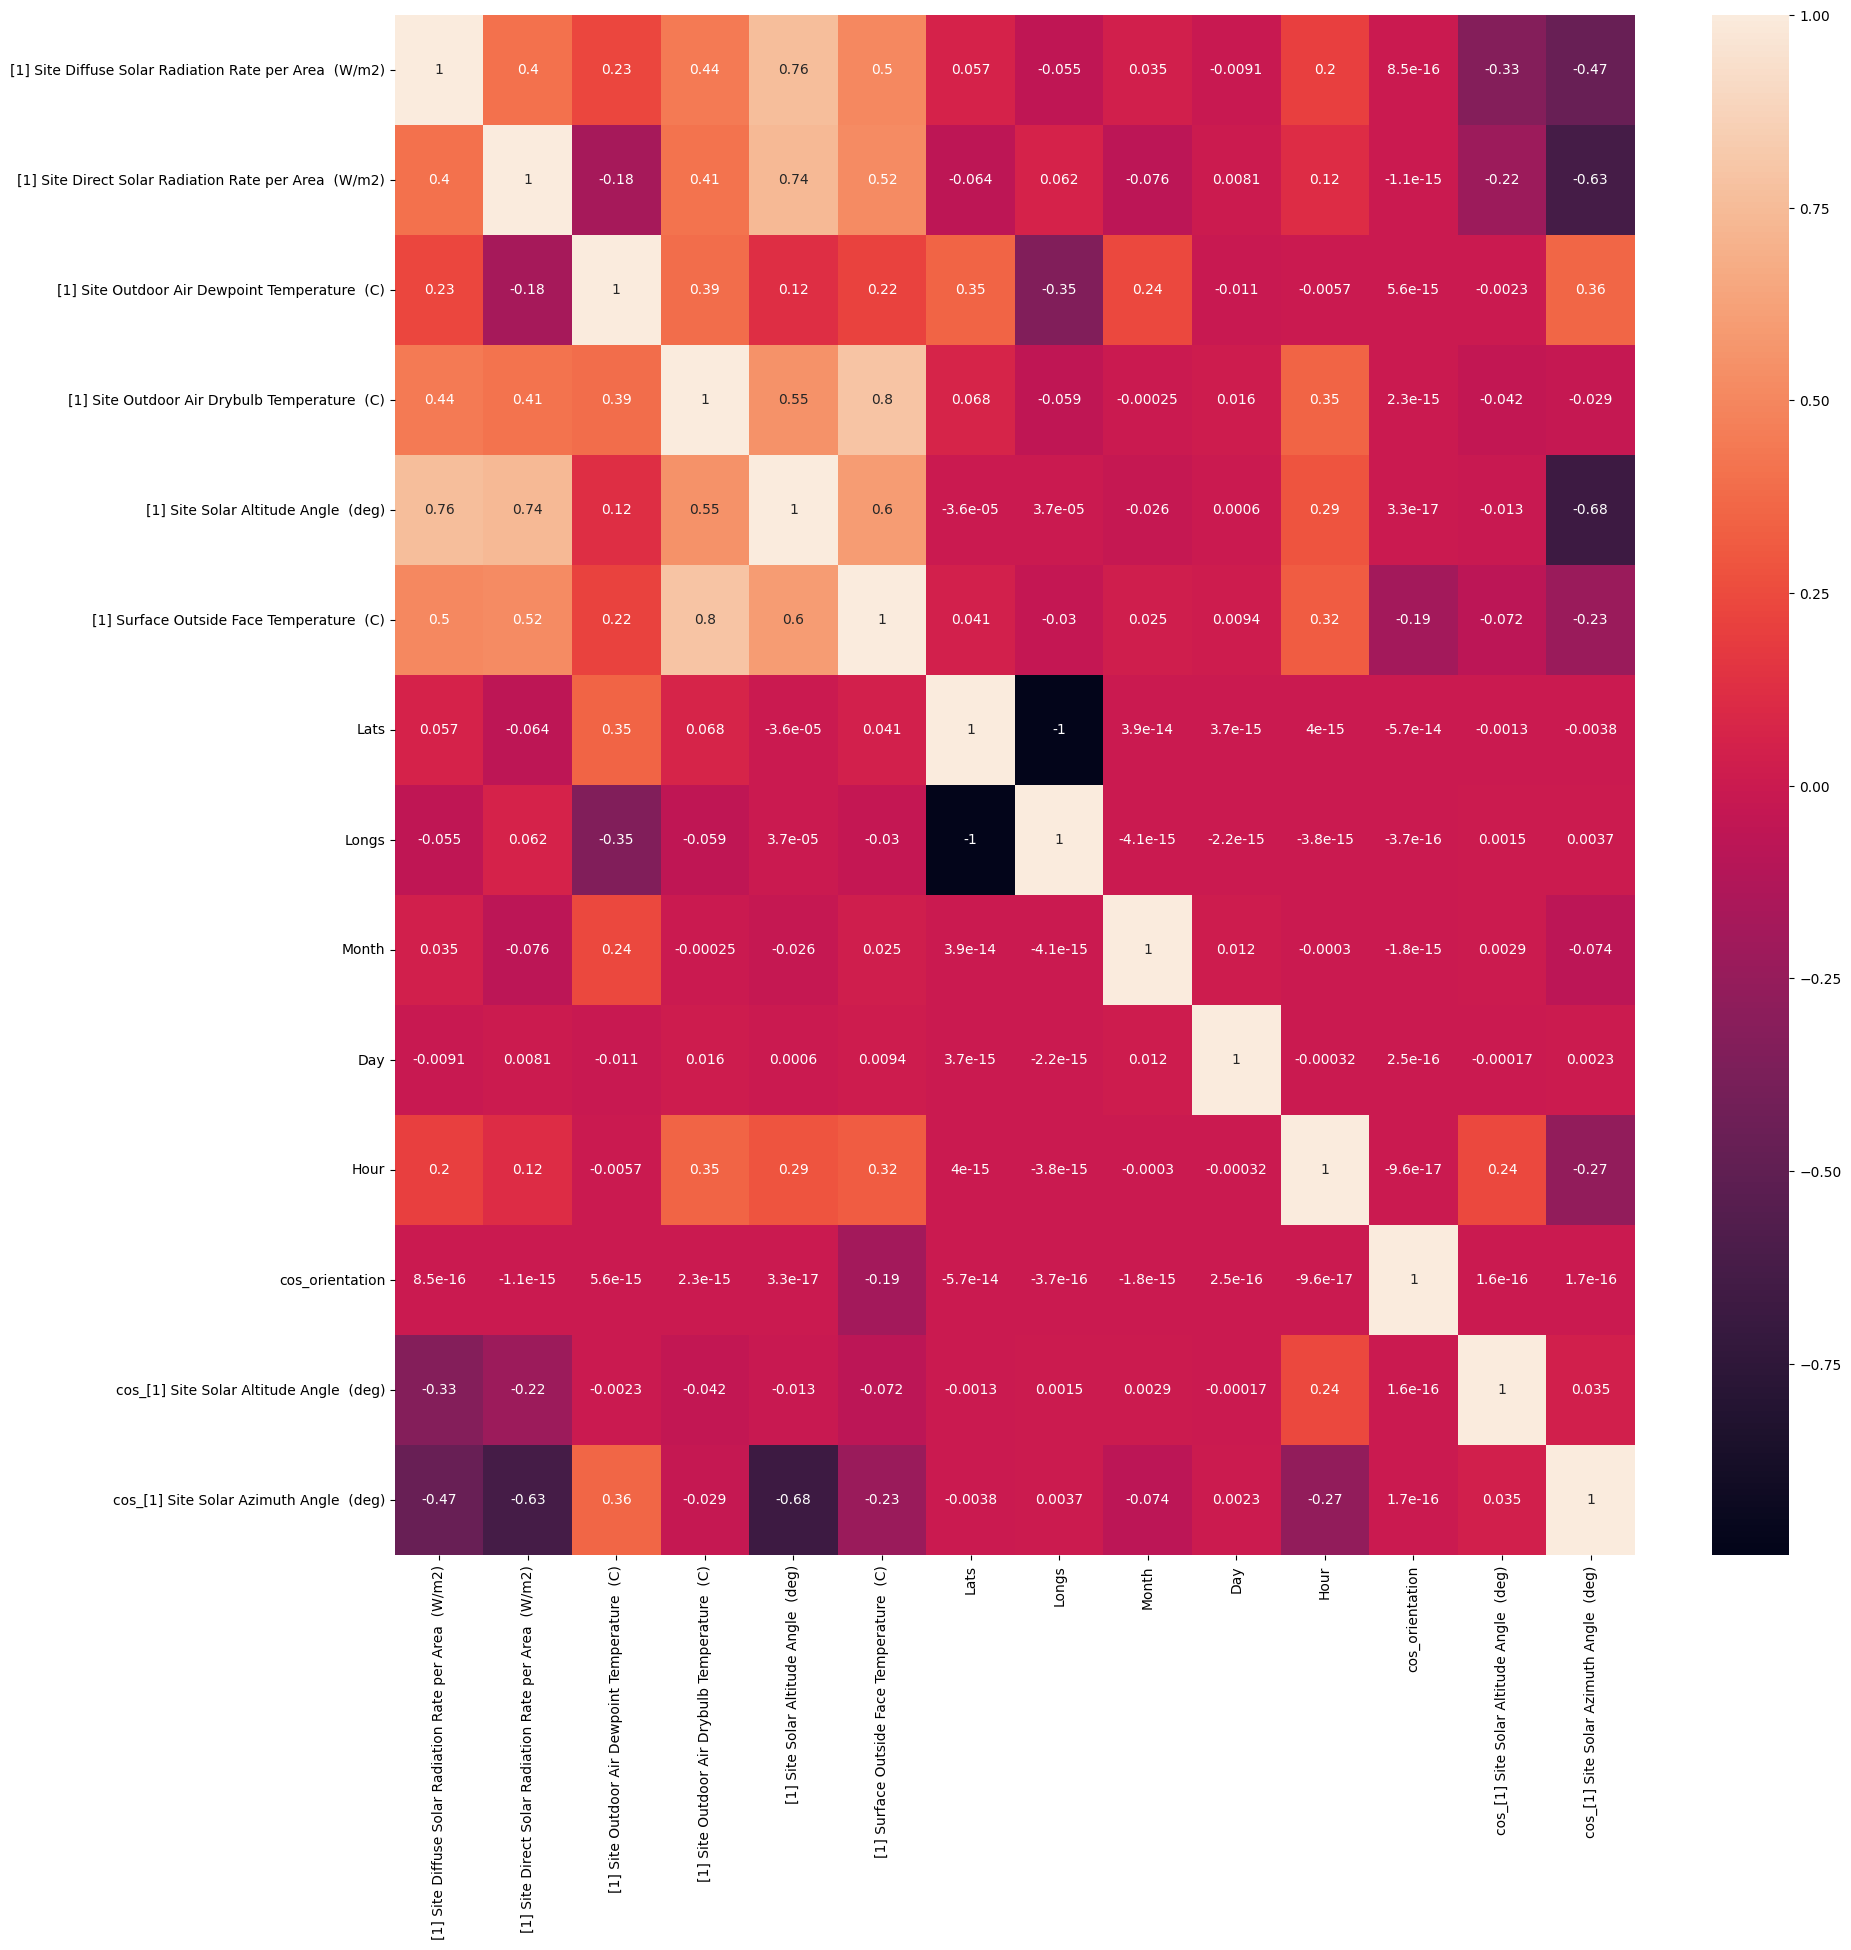

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(new_data.corr(),annot = True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [40]:
reg = LinearRegression().fit(X_train, y_train)

In [41]:
reg.score(X_train, y_train)

0.7451252735463413

In [42]:
data.columns

Index(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Surface Outside Face Temperature  (C)', 'Lats', 'Longs', 'Month',
       'Day', 'Hour', 'cos_orientation',
       'cos_[1] Site Solar Altitude Angle  (deg)',
       'cos_[1] Site Solar Azimuth Angle  (deg)'],
      dtype='object')

In [43]:
new_data['GHI']=(data['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)']*np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))
                 +data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'])

In [44]:
new_data

,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Surface Outside Face Temperature (C),Lats,Longs,Month,Day,Hour,cos_orientation,cos_[1] Site Solar Altitude Angle (deg),cos_[1] Site Solar Azimuth Angle (deg),GHI
0,0.0,0.0,5.600,14.075,-86.550209,17.425801,23.0225,72.5714,1,1,1,1.000000e+00,0.060174,-0.019268,0.0
1,0.0,0.0,6.500,13.550,-75.710457,17.436224,23.0225,72.5714,1,1,2,1.000000e+00,0.246822,-0.055074,0.0
2,0.0,0.0,7.400,13.125,-61.958056,17.430286,23.0225,72.5714,1,1,3,1.000000e+00,0.470118,-0.107289,0.0
3,0.0,0.0,7.825,12.400,-48.286846,17.410444,23.0225,72.5714,1,1,4,1.000000e+00,0.665402,-0.163028,0.0
4,0.0,0.0,7.975,11.600,-34.749348,17.374948,23.0225,72.5714,1,1,5,1.000000e+00,0.821653,-0.223642,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,0.0,0.0,6.325,21.350,-12.176278,23.663594,22.7196,75.8577,12,31,19,6.123234e-17,0.977503,-0.347699,0.0
8755,0.0,0.0,6.550,18.375,-25.321975,22.149918,22.7196,75.8577,12,31,20,6.123234e-17,0.903919,-0.275380,0.0
8756,0.0,0.0,7.050,16.025,-38.737982,20.445485,22.7196,75.8577,12,31,21,6.123234e-17,0.780016,-0.212651,0.0
8757,0.0,0.0,7.575,14.450,-52.333160,19.256711,22.7196,75.8577,12,31,22,6.123234e-17,0.611069,-0.157728,0.0


In [45]:
new_data.drop(['cos_[1] Site Solar Altitude Angle  (deg)','[1] Site Solar Altitude Angle  (deg)','[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)','[1] Site Direct Solar Radiation Rate per Area  (W/m2)'],axis=1,inplace=True)

In [46]:
new_data

,[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Surface Outside Face Temperature (C),Lats,Longs,Month,Day,Hour,cos_orientation,cos_[1] Site Solar Azimuth Angle (deg),GHI
0,5.600,14.075,17.425801,23.0225,72.5714,1,1,1,1.000000e+00,-0.019268,0.0
1,6.500,13.550,17.436224,23.0225,72.5714,1,1,2,1.000000e+00,-0.055074,0.0
2,7.400,13.125,17.430286,23.0225,72.5714,1,1,3,1.000000e+00,-0.107289,0.0
3,7.825,12.400,17.410444,23.0225,72.5714,1,1,4,1.000000e+00,-0.163028,0.0
4,7.975,11.600,17.374948,23.0225,72.5714,1,1,5,1.000000e+00,-0.223642,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8754,6.325,21.350,23.663594,22.7196,75.8577,12,31,19,6.123234e-17,-0.347699,0.0
8755,6.550,18.375,22.149918,22.7196,75.8577,12,31,20,6.123234e-17,-0.275380,0.0
8756,7.050,16.025,20.445485,22.7196,75.8577,12,31,21,6.123234e-17,-0.212651,0.0
8757,7.575,14.450,19.256711,22.7196,75.8577,12,31,22,6.123234e-17,-0.157728,0.0


<Axes: >

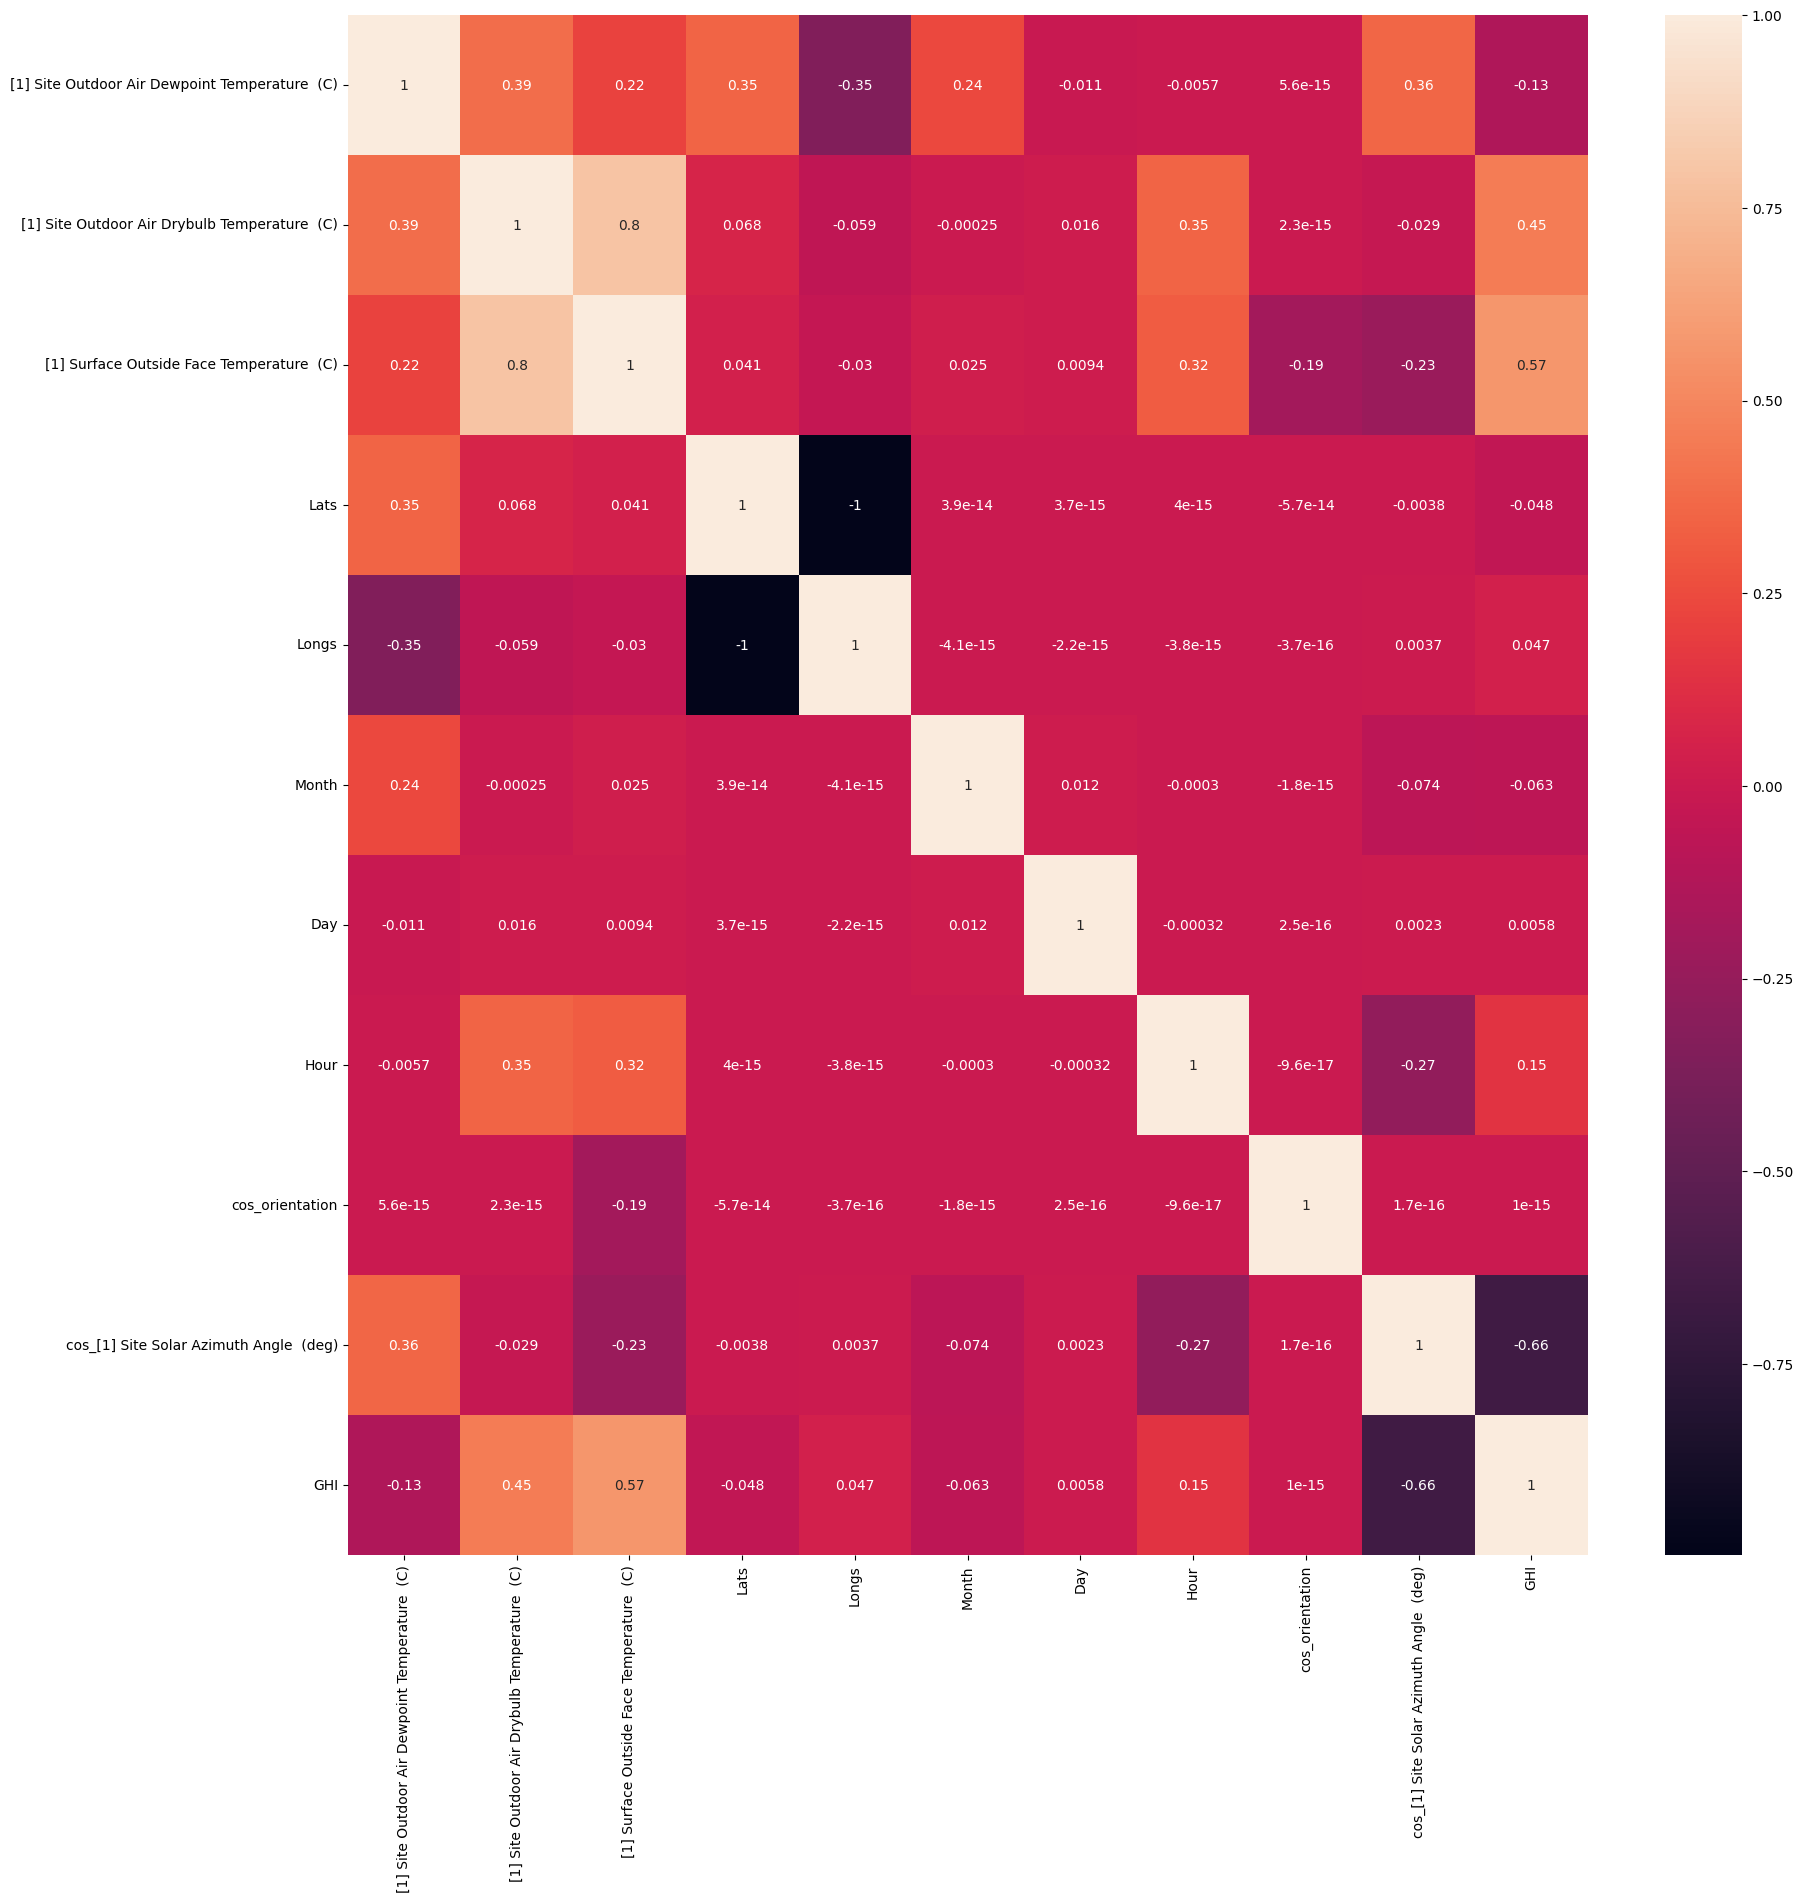

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(new_data.corr(),annot = True)

In [48]:
X = new_data.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = new_data['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)', 'Lats', 'Longs',
       'Month', 'Day', 'Hour', 'cos_orientation',
       'cos_[1] Site Solar Azimuth Angle  (deg)', 'GHI'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [50]:
reg = LinearRegression().fit(X_train, y_train)

In [51]:
reg.score(X_train, y_train)

0.7337174095632484